Label 5 - Area: 8616, Centroid: (centroid_x, centroid_y), Bounding Box: (862, 495, 128, 116)
Label 8 - Area: 9412, Centroid: (centroid_x, centroid_y), Bounding Box: (355, 828, 149, 115)
Label 10 - Area: 8950, Centroid: (centroid_x, centroid_y), Bounding Box: (905, 932, 133, 134)


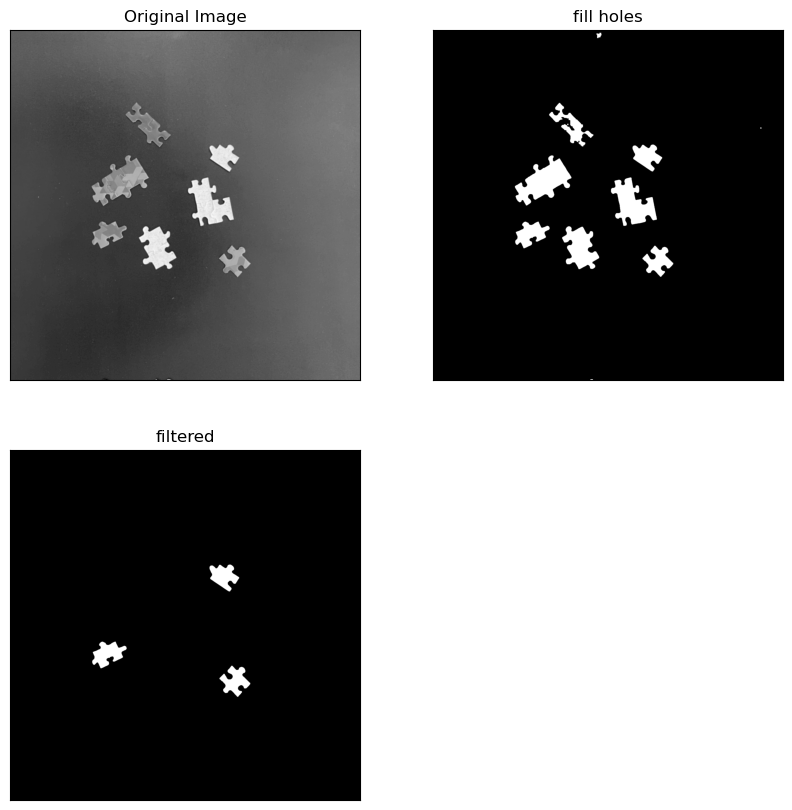

In [4]:
import cv2
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('../Image Processing for Engineering and Science/Data/MathWorks Images/MathWorks Puzzle/Puzzle_01.jpg', cv2.IMREAD_GRAYSCALE)



# Define the size of the Gaussian kernel and standard deviation
kernel_size = (7, 7)  # Adjust as needed
sigma = 0.0  # Adjust as needed

# Apply Gaussian filtering
img = cv2.GaussianBlur(img, kernel_size, sigma)

T = 140
ret,th1 = cv.threshold(img,T,255,cv.THRESH_BINARY)

# Define the structuring element (kernel) for opening
kernel_size = (5, 5)  # Adjust the size as needed
structuring_element = np.ones(kernel_size, np.uint8)

# Perform morphological opening
opened_image = cv2.morphologyEx(th1, cv2.MORPH_OPEN, structuring_element)

# Define the structuring element (kernel) for opening
kernel_size = (5, 5)  # Adjust the size as needed
structuring_element = np.ones(kernel_size, np.uint8)

# Perform morphological opening
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, structuring_element)

im_th = closed_image
# Copy the thresholded image.
im_floodfill = im_th.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
binary_image = im_th | im_floodfill_inv



#/**//*/*


# Perform connected component analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Define the minimum and maximum values for the desired property
min_value = 4000  # Adjust as needed
max_value = 9500  # Adjust as needed

# Create a binary mask to store the filtered regions
filtered_mask = np.zeros_like(binary_image)

# Loop through each connected component (excluding the background label 0)
for label in range(1, num_labels):
    # Get the statistics for the current component
    left, top, width, height, area = stats[label]

    # Check if the property value falls within the desired range
    if min_value <= area <= max_value:
        # Add the region to the filtered mask
        filtered_mask[labels == label] = 255

        # Print or use the properties as needed
        print(f"Label {label} - Area: {area}, Centroid: (centroid_x, centroid_y), Bounding Box: ({left}, {top}, {width}, {height})")



#/**//*/*
    
    
# Display or save the filtered image
titles = ['Original Image', 'fill holes', 'filtered']
images = [img, binary_image, filtered_mask]
fig = plt.figure(figsize=(10, 10))
for i in range(3):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

